In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
height

array([1.84617543, 1.7195476 , 1.85275263, ..., 1.59669981, 1.72585608,
       1.54860615])

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e=y-tx.dot(w)
    return sum(e*e)/(2*len(e))

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j]=compute_loss(y, tx, np.array([grid_w0[i],grid_w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=20.759339381144258, w0*=75.86206896551724, w1*=15.517241379310349, execution time=0.866 seconds


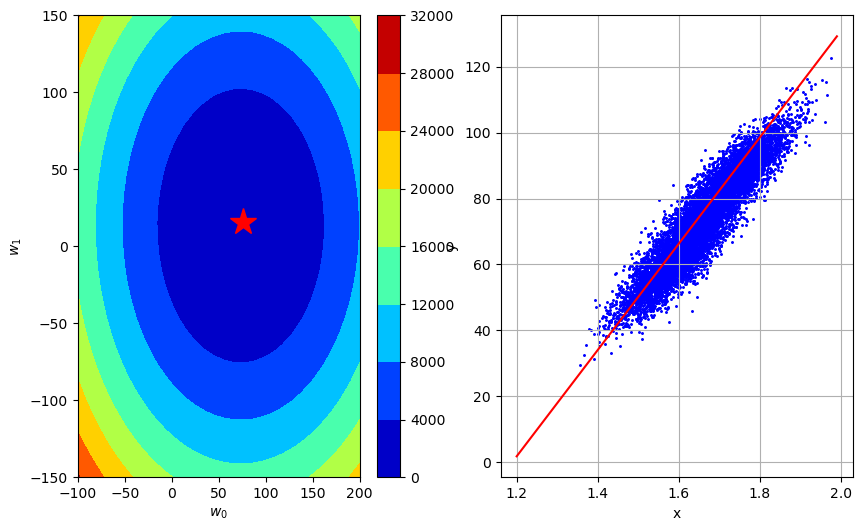

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=30)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

In [7]:
mean_x, std_x

(1.6591889938705313, 0.09618339348893848)

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    e=y-tx.dot(w)
    return -(1/len(y))*tx.T.dot(e)

Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient=compute_gradient(y, tx, w)
        loss=compute_loss(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591647, w0=7.329392200210475, w1=1.3479712434989204
GD iter. 1/49: loss=2264.6350560300007, w0=13.92584518039996, w1=2.5611453626479217
GD iter. 2/49: loss=1837.27771407937, w0=19.862652862570464, w1=3.653002069882027
GD iter. 3/49: loss=1491.1182670993785, w0=25.205779776523926, w1=4.635673106392729
GD iter. 4/49: loss=1210.729115045579, w0=30.01459399908207, w1=5.520077039252341
GD iter. 5/49: loss=983.6139018819912, w0=34.34252679938438, w1=6.316040578826014
GD iter. 6/49: loss=799.6505792194947, w0=38.237666319656455, w1=7.032407764442313
GD iter. 7/49: loss=650.6402878628645, w0=41.7432918879013, w1=7.677138231496978
GD iter. 8/49: loss=529.941951863998, w0=44.89835489932168, w1=8.257395651846178
GD iter. 9/49: loss=432.176299704918, w0=47.73791160960005, w1=8.779627330160464
GD iter. 10/49: loss=352.98612145605927, w0=50.29351264885055, w1=9.249635840643316
GD iter. 11/49: loss=288.8420770744868, w0=52.59355358417602, w1=9.67264350007789
GD iter. 1

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    e=y-tx.dot(w)
    return -(1/len(y))*tx.T.dot(e)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        for sgd_y, sgd_tx in batch_iter(y, tx, batch_size,num_batches=2):
            gradient=compute_gradient(sgd_y, sgd_tx, w)
            loss=compute_loss(sgd_y,sgd_tx,w)
            w=w-gamma*gradient
            ws.append(w)
            losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [13]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1802.3573126858796, w0=10.871929270513405, w1=-11.195509450061717
SGD iter. 1/49: loss=690.7118500307239, w0=22.980934312710023, w1=-7.3685953185459825
SGD iter. 2/49: loss=239.26923225800854, w0=30.71526085477808, w1=-9.214925066027286
SGD iter. 3/49: loss=686.7994100847746, w0=43.22430804574302, w1=7.525828003878685
SGD iter. 4/49: loss=437.7282947919174, w0=49.65628507995269, w1=5.064229303926384
SGD iter. 5/49: loss=231.24772193514417, w0=55.54709891770641, w1=9.72924868044328
SGD iter. 6/49: loss=40.732223481300196, w0=58.758539940960446, w1=9.812966463656288
SGD iter. 7/49: loss=40.31505640069152, w0=60.19068481171492, w1=9.635880298235442
SGD iter. 8/49: loss=37.350457143186276, w0=62.457130405354874, w1=8.202549210962523
SGD iter. 9/49: loss=172.9649397421498, w0=65.65556628382323, w1=7.61262876598463
SGD iter. 10/49: loss=39.653106111564675, w0=68.61898713647982, w1=11.038569855505406
SGD iter. 11/49: loss=0.3312470900205081, w0=69.59761902930289, w1=11.00

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [15]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [16]:
y.shape, tx.shape

((202,), (202, 2))

In [17]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358542, w0=51.84746409844842, w1=7.724426406192425
GD iter. 1/49: loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050116
GD iter. 2/49: loss=88.64235561651282, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.9455122175746
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481912
GD iter. 7/49: loss=65.93086421248086, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889339, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140234, w0=74.06776649225755, w1=11.034889001593541
GD iter

In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [19]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [20]:
def compute_subgradient_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    loss=abs(y-tx.dot(w))
    return np.mean(loss)

In [35]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    subgras=np.array([0,0])
    for i in range(len(y)):
        yi=y[i]
        xi=tx[i,:]
        e=yi-xi.dot(w)
        if e!=0:

            subgras = subgras+e/abs(e)*(-xi)
    return subgras/len(y)

In [36]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient=compute_subgradient_mae(y, tx, w)
        loss=compute_subgradient_loss(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*gradient

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [37]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.29392200210518, w0=0.7, w1=-1.5529755259535704e-15
SubGD iter. 1/499: loss=72.59392200210517, w0=1.4, w1=-3.1059510519071408e-15
SubGD iter. 2/499: loss=71.89392200210517, w0=2.0999999999999996, w1=-4.658926577860711e-15
SubGD iter. 3/499: loss=71.19392200210518, w0=2.8, w1=-6.2119021038142816e-15
SubGD iter. 4/499: loss=70.49392200210517, w0=3.5, w1=-7.764877629767851e-15
SubGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=-9.317853155721422e-15
SubGD iter. 6/499: loss=69.09392200210519, w0=4.9, w1=-1.0870828681674993e-14
SubGD iter. 7/499: loss=68.39392200210517, w0=5.6000000000000005, w1=-1.2423804207628563e-14
SubGD iter. 8/499: loss=67.69392200210518, w0=6.300000000000001, w1=-1.3976779733582134e-14
SubGD iter. 9/499: loss=66.99392200210517, w0=7.000000000000001, w1=-1.5529755259535703e-14
SubGD iter. 10/499: loss=66.29392200210518, w0=7.700000000000001, w1=-1.7082730785489272e-14
SubGD iter. 11/499: loss=65.59392200210519, w0=8.4, w1=-1.86357063114428

SubGD iter. 96/499: loss=11.313435023601551, w0=63.86463999999997, w1=5.747997496770113
SubGD iter. 97/499: loss=10.911156920015099, w0=64.30129999999997, w1=6.043221223968383
SubGD iter. 98/499: loss=10.516948122608078, w0=64.72773999999997, w1=6.340354080836923
SubGD iter. 99/499: loss=10.13359513103867, w0=65.14381999999996, w1=6.63994524590634
SubGD iter. 100/499: loss=9.760677429923486, w0=65.54995999999996, w1=6.939754306256994
SubGD iter. 101/499: loss=9.398674623189937, w0=65.94755999999995, w1=7.240382293155359
SubGD iter. 102/499: loss=9.046552477133655, w0=66.33451999999996, w1=7.542759507922872
SubGD iter. 103/499: loss=8.704760514732415, w0=66.71139999999995, w1=7.846017516367578
SubGD iter. 104/499: loss=8.372871671628266, w0=67.07791999999995, w1=8.149168076773346
SubGD iter. 105/499: loss=8.052713872262597, w0=67.43603999999995, w1=8.450471378640396
SubGD iter. 106/499: loss=7.741845358498816, w0=67.78645999999995, w1=8.751045452661094
SubGD iter. 107/499: loss=7.440636

SubGD iter. 192/499: loss=4.424631661214848, w0=73.23847999999995, w1=13.524620928298864
SubGD iter. 193/499: loss=4.424631622214842, w0=73.23847999999995, w1=13.524586781150308
SubGD iter. 194/499: loss=4.424631620549089, w0=73.23847999999995, w1=13.524552634001752
SubGD iter. 195/499: loss=4.424631618883335, w0=73.23847999999995, w1=13.524518486853196
SubGD iter. 196/499: loss=4.424631617217582, w0=73.23847999999995, w1=13.52448433970464
SubGD iter. 197/499: loss=4.424631615551827, w0=73.23847999999995, w1=13.524450192556085
SubGD iter. 198/499: loss=4.424631613886072, w0=73.23847999999995, w1=13.524416045407529
SubGD iter. 199/499: loss=4.4246316122203195, w0=73.23847999999995, w1=13.524381898258973
SubGD iter. 200/499: loss=4.424631615444577, w0=73.23861999999995, w1=13.524604807884836
SubGD iter. 201/499: loss=4.424631621428463, w0=73.23861999999995, w1=13.52457066073628
SubGD iter. 202/499: loss=4.424631619762709, w0=73.23861999999995, w1=13.524536513587725
SubGD iter. 203/499: l

SubGD iter. 290/499: loss=4.4246315860332235, w0=73.23987999999997, w1=13.523845075484582
SubGD iter. 291/499: loss=4.424631584367469, w0=73.23987999999997, w1=13.523810928336026
SubGD iter. 292/499: loss=4.424631582701716, w0=73.23987999999997, w1=13.52377678118747
SubGD iter. 293/499: loss=4.424631581035962, w0=73.23987999999997, w1=13.523742634038914
SubGD iter. 294/499: loss=4.424631579370208, w0=73.23987999999997, w1=13.523708486890358
SubGD iter. 295/499: loss=4.424631577704453, w0=73.23987999999997, w1=13.523674339741802
SubGD iter. 296/499: loss=4.4246315760387, w0=73.23987999999997, w1=13.523640192593247
SubGD iter. 297/499: loss=4.424631574372945, w0=73.23987999999997, w1=13.52360604544469
SubGD iter. 298/499: loss=4.424631582508949, w0=73.24001999999997, w1=13.523828955070554
SubGD iter. 299/499: loss=4.424631583581089, w0=73.24001999999997, w1=13.523794807921998
SubGD iter. 300/499: loss=4.424631581915335, w0=73.24001999999997, w1=13.523760660773442
SubGD iter. 301/499: los

SubGD iter. 386/499: loss=4.424631550692105, w0=73.24127999999999, w1=13.523137516967411
SubGD iter. 387/499: loss=4.424631549851604, w0=73.24127999999999, w1=13.523103369818855
SubGD iter. 388/499: loss=4.42463154818585, w0=73.24127999999999, w1=13.5230692226703
SubGD iter. 389/499: loss=4.4246315465200965, w0=73.24127999999999, w1=13.523035075521744
SubGD iter. 390/499: loss=4.424631544854342, w0=73.24127999999999, w1=13.523000928373188
SubGD iter. 391/499: loss=4.424631543188589, w0=73.24127999999999, w1=13.522966781224632
SubGD iter. 392/499: loss=4.424631541522834, w0=73.24127999999999, w1=13.522932634076076
SubGD iter. 393/499: loss=4.424631539857081, w0=73.24127999999999, w1=13.52289848692752
SubGD iter. 394/499: loss=4.424631538191327, w0=73.24127999999999, w1=13.522864339778964
SubGD iter. 395/499: loss=4.4246315386994235, w0=73.24141999999999, w1=13.523087249404828
SubGD iter. 396/499: loss=4.4246315473994695, w0=73.24141999999999, w1=13.523053102256272
SubGD iter. 397/499: l

SubGD iter. 481/499: loss=4.424631540477442, w0=73.24155999999999, w1=13.522913382997018
SubGD iter. 482/499: loss=4.424631538917981, w0=73.24155999999999, w1=13.522879235848462
SubGD iter. 483/499: loss=4.424631537252228, w0=73.24155999999999, w1=13.522845088699906
SubGD iter. 484/499: loss=4.424631535586474, w0=73.24155999999999, w1=13.52281094155135
SubGD iter. 485/499: loss=4.42463153392072, w0=73.24155999999999, w1=13.522776794402795
SubGD iter. 486/499: loss=4.424631532254966, w0=73.24155999999999, w1=13.522742647254239
SubGD iter. 487/499: loss=4.424631530589211, w0=73.24155999999999, w1=13.522708500105683
SubGD iter. 488/499: loss=4.424631532325371, w0=73.2417, w1=13.522931409731546
SubGD iter. 489/499: loss=4.424631540573133, w0=73.24155999999999, w1=13.52291862043008
SubGD iter. 490/499: loss=4.424631539173472, w0=73.24155999999999, w1=13.522884473281524
SubGD iter. 491/499: loss=4.424631537507717, w0=73.24155999999999, w1=13.522850326132968
SubGD iter. 492/499: loss=4.424631

In [38]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [46]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for sgd_y, sgd_tx in batch_iter(y, tx, batch_size):
            gradient=compute_subgradient_mae(sgd_y, sgd_tx, w)
            loss=compute_subgradient_loss(sgd_y, sgd_tx,w)
            w=w-gamma*gradient
            ws.append(w)
            losses.append(loss)
        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [47]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=91.16177193214804, w0=0.7, w1=0.6415810456366805
SubSGD iter. 1/499: loss=62.94242296747063, w0=1.4, w1=0.2173140433934982
SubSGD iter. 2/499: loss=77.32817166197381, w0=2.0999999999999996, w1=0.4935212594326231
SubSGD iter. 3/499: loss=77.84876964276872, w0=2.8, w1=0.8855179270064097
SubSGD iter. 4/499: loss=58.27318120407499, w0=3.5, w1=0.18180972415787544
SubSGD iter. 5/499: loss=73.185644693066, w0=4.2, w1=0.12042473302751833
SubSGD iter. 6/499: loss=48.1817815648039, w0=4.9, w1=-0.801582168809935
SubSGD iter. 7/499: loss=83.0882878969828, w0=5.6000000000000005, w1=-0.11741277955418761
SubSGD iter. 8/499: loss=78.5673112858047, w0=6.300000000000001, w1=-0.3264636599988791
SubSGD iter. 9/499: loss=60.01715478383878, w0=7.000000000000001, w1=-0.6559937584391224
SubSGD iter. 10/499: loss=37.80714567637469, w0=7.700000000000001, w1=-2.1398196741021307
SubSGD iter. 11/499: loss=66.37122471353136, w0=8.4, w1=-2.0825649598221245
SubSGD iter. 12/499: loss=39.203769

In [48]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>